# 00 Data exploration

Data exploration is a crucial first step in any data science project.
It involves understanding the data's structure, identifying patterns or trends, and detecting anomalies or missing values.

## Loading data

Loading data is a fundamental step in any data science project, setting the stage for all subsequent analysis and modeling tasks.
Efficiently managing and loading data is especially critical when dealing with large datasets, as improper handling can lead to memory issues and slow performance.
In this section, we will demonstrate how to load our dataset using the [`polars`](https://docs.pola.rs/) and [`pyarrow`](https://arrow.apache.org/docs/python/).

To begin with, we import the [`polars`](https://docs.pola.rs/) library using

```python
import polars as pl
```

this high-performance DataFrame library is designed to handle large datasets efficiently.
Polars is known for its speed and memory efficiency, making it an excellent choice for data manipulation and analytical tasks where performance is crucial.
It offers a familiar `DataFrame` API that is intuitive for users with experience in [`pandas`](https://pandas.pydata.org/) but provides significant performance advantages, particularly with large datasets.
Using Polars ensures that our data processing tasks remain performant and scalable, preventing the crashes and slowdowns that often occur with less efficient libraries.

In [1]:
import polars as pl

While `polars` is designed for high-performance data set analysis, there are always limits from the data set size and computational hardware&mdash;specifically memory.
Our Leash biosciences training data is a 3.8 GB [parquet](https://parquet.apache.org/docs/) file which could likely cause issues if trying to load it with `polars`.

Instead, we will demonstrate how to load parquet files with the test set (which is only 30.2 MB).
This is done with the [`read_parquet`](https://docs.pola.rs/py-polars/html/reference/api/polars.read_parquet.html) function in polars.

In [2]:
data_test = pl.read_parquet(source="../../../data/test.parquet")

Once the data is loaded into the DataFrame, we can inspect the first few rows to ensure it has been read correctly and to get an initial understanding of its structure.
This initial inspection helps with:

- **Data Verification**: Ensuring that the data has been loaded correctly is a critical first step. By inspecting the first few rows, we confirm that the data structure matches our expectations.
- **Understanding Structure**: This initial inspection provides a clear picture of the data's structure, which is essential for planning subsequent data processing and analysis steps.
- **Spotting Issues Early**: Early detection of any anomalies or inconsistencies in the data can save significant time and effort later in the analysis process.

The [`DataFrame.head`](https://docs.pola.rs/py-polars/html/reference/dataframe/api/polars.DataFrame.head.html#polars.DataFrame.head) function will print the first five of the DataFrame, giving us a snapshot of the dataset.

In [3]:
print(data_test.head(n=5))

shape: (5, 6)
┌───────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────┬──────────────┐
│ id        ┆ buildingblock1_ ┆ buildingblock2_ ┆ buildingblock3_ ┆ molecule_smiles ┆ protein_name │
│ ---       ┆ smiles          ┆ smiles          ┆ smiles          ┆ ---             ┆ ---          │
│ i64       ┆ ---             ┆ ---             ┆ ---             ┆ str             ┆ str          │
│           ┆ str             ┆ str             ┆ str             ┆                 ┆              │
╞═══════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╪══════════════╡
│ 295246830 ┆ C#CCCC[C@H](NC( ┆ C=Cc1ccc(N)cc1  ┆ C=Cc1ccc(N)cc1  ┆ C#CCCC[C@H](Nc1 ┆ BRD4         │
│           ┆ =O)OCC1c2ccccc2 ┆                 ┆                 ┆ nc(Nc2ccc(C=C)c ┆              │
│           ┆ …               ┆                 ┆                 ┆ …               ┆              │
│ 295246831 ┆ C#CCCC[C@H](NC( ┆ C=Cc1ccc(N)cc1  ┆ C=Cc1ccc(N)cc1  ┆ C#CCCC[C@

After loading the test data into a Polars DataFrame, we inspect the first few rows to verify the data's integrity and understand its structure.
The output reveals that the DataFrame has a shape of 5 rows and 6 columns, which aligns with our request to display the first five rows.
This initial check confirms that the DataFrame has the expected dimensions, which is a critical step in validating that the data has been loaded correctly.

Each column in the DataFrame serves a specific purpose and has a designated data type.
The `id` column is a unique identifier for each molecule-protein pair, and it is stored as a 64-bit integer (`i64`).
The `buildingblock1_smiles`, `buildingblock2_smiles`, and `buildingblock3_smiles` columns contain the SMILES representations of the individual building blocks of the molecules.
These columns are of type `str` (string), as SMILES strings are textual representations of chemical structures.
The `molecule_smiles` column holds the SMILES representation of the fully assembled molecule, which includes the three building blocks and the core structure.
This column is also of type `str`. Lastly, the `protein_name` column, which is of type `str`, indicates the name of the protein target that each molecule is associated with.

The content of the rows provides a snapshot of the data, where each row represents a unique molecule-protein pair along with its corresponding SMILES strings and protein name.
For instance, the first row shows a molecule with an `id` of 295246830, which is composed of three building blocks with their respective SMILES strings.
The fully assembled molecule's SMILES string is also provided, and the protein target for this molecule is `BRD4`. This detailed breakdown allows us to understand the composition and target of each molecule in the dataset.

Additionally, we notice the presence of ellipses (`…`) in the SMILES strings.
These ellipses indicate that the SMILES strings are too long to be fully displayed in the output, which is common given the complexity and length of chemical structures represented in SMILES notation.
The truncated display helps maintain readability while providing a glimpse of the data's content.

We can also look at the last two rows using the [`DataFrame.tail`](https://docs.pola.rs/py-polars/html/reference/dataframe/api/polars.DataFrame.tail.html) function.
Now we have to specify `n=2` to change the number of rows.

In [4]:
print(data_test.tail(n=2))

shape: (2, 6)
┌───────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────┬──────────────┐
│ id        ┆ buildingblock1_ ┆ buildingblock2_ ┆ buildingblock3_ ┆ molecule_smiles ┆ protein_name │
│ ---       ┆ smiles          ┆ smiles          ┆ smiles          ┆ ---             ┆ ---          │
│ i64       ┆ ---             ┆ ---             ┆ ---             ┆ str             ┆ str          │
│           ┆ str             ┆ str             ┆ str             ┆                 ┆              │
╞═══════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╪══════════════╡
│ 296921724 ┆ [N-]=[N+]=NCCC[ ┆ Nc1noc2ccc(F)cc ┆ NCc1cccs1       ┆ [N-]=[N+]=NCCC[ ┆ HSA          │
│           ┆ C@H](NC(=O)OCC1 ┆ 12              ┆                 ┆ C@H](Nc1nc(NCc2 ┆              │
│           ┆ …               ┆                 ┆                 ┆ …               ┆              │
│ 296921725 ┆ [N-]=[N+]=NCCC[ ┆ Nc1noc2ccc(F)cc ┆ NCc1cccs1       ┆ [N-]=[N+]

### Chunked reading

For very large datasets, chunked reading is a more efficient approach.
This method reads the dataset in smaller chunks, which helps manage memory usage more effectively.
By processing data incrementally, chunked reading avoids the pitfalls of memory overload and allows for scalable data exploration and analysis.

1. **Memory Management**: Large datasets can easily exceed the available memory, causing kernel crashes or significant slowdowns. Chunked reading mitigates this by only loading manageable portions of the data at a time.
2. **Scalability**: Chunked reading enables the handling of datasets that are much larger than the system’s memory capacity, making it a scalable solution for big data problems.
3. **Incremental Processing**: It allows for incremental processing of data, which can be useful for real-time data analysis and processing tasks.
4. **Flexibility**: You can perform operations on each chunk independently, which provides flexibility in data processing and can lead to more efficient computations.

Chunked reading involves reading a fixed number of rows (a chunk) from the dataset, processing that chunk, and then moving on to the next chunk.
This approach ensures that only a small portion of the dataset is loaded into memory at any given time.
To start, we need to import the necessary library for reading parquet files.
We will use the [`pyarrow.dataset.dataset`](https://arrow.apache.org/docs/python/generated/pyarrow.dataset.dataset.html#) function to interface with our data.

In [5]:
import pyarrow.dataset as ds

With the library imported, we can now define a function to read the dataset in chunks.
This will help us manage the large data size without overwhelming our system's memory.


[ParqetFile](https://arrow.apache.org/docs/python/generated/pyarrow.parquet.ParquetFile.html)

In [6]:
path_train_data = "../../../data/train.parquet"
data_train = ds.dataset(source=path_train_data, format="parquet")

This will return a pyarrow [Dataset](https://arrow.apache.org/docs/python/generated/pyarrow.dataset.Dataset.html).

[`ds.head()`](https://arrow.apache.org/docs/python/generated/pyarrow.dataset.Dataset.html#pyarrow.dataset.Dataset.head)

In [7]:
data_train.head(num_rows=5)

pyarrow.Table
id: int64
buildingblock1_smiles: string
buildingblock2_smiles: string
buildingblock3_smiles: string
molecule_smiles: string
protein_name: string
binds: int64
----
id: [[0,1,2,3,4]]
buildingblock1_smiles: [["C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21","C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21","C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21","C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21","C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21"]]
buildingblock2_smiles: [["C#CCOc1ccc(CN)cc1.Cl","C#CCOc1ccc(CN)cc1.Cl","C#CCOc1ccc(CN)cc1.Cl","C#CCOc1ccc(CN)cc1.Cl","C#CCOc1ccc(CN)cc1.Cl"]]
buildingblock3_smiles: [["Br.Br.NCC1CCCN1c1cccnn1","Br.Br.NCC1CCCN1c1cccnn1","Br.Br.NCC1CCCN1c1cccnn1","Br.NCc1cccc(Br)n1","Br.NCc1cccc(Br)n1"]]
molecule_smiles: [["C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1","C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1","C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1","C#

## Visualizing

In [8]:
example_row = data_train.head(num_rows=1)
print(example_row)

pyarrow.Table
id: int64
buildingblock1_smiles: string
buildingblock2_smiles: string
buildingblock3_smiles: string
molecule_smiles: string
protein_name: string
binds: int64
----
id: [[0]]
buildingblock1_smiles: [["C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21"]]
buildingblock2_smiles: [["C#CCOc1ccc(CN)cc1.Cl"]]
buildingblock3_smiles: [["Br.Br.NCC1CCCN1c1cccnn1"]]
molecule_smiles: [["C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1"]]
protein_name: [["BRD4"]]
binds: [[0]]


In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

In [10]:
def get_mol(smi):
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    return mol

In [11]:
def show_mol(smi, style="stick"):
    
    mol = get_mol(smi)
    mblock = Chem.MolToMolBlock(mol)

    view = py3Dmol.view(width=500, height=500)
    view.addModel(mblock, "mol")
    view.setStyle({style: {}})
    view.zoomTo()
    view.show()

In [12]:
smi = example_row["buildingblock1_smiles"][0].as_py()
print(smi)
show_mol(smi)

C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Cleaning smiles


In [13]:
smi = example_row["buildingblock2_smiles"][0].as_py()
print(smi)
show_mol(smi)

C#CCOc1ccc(CN)cc1.Cl


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [14]:
def clean_smi(smi):

    # Remove [Dy] from smiles
    smi = smi.replace("[Dy]", "")

    # Convert SMILES to a RDKit molecule object
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        raise ValueError("Invalid SMILES string")
    
    # Remove any salts or fragments
    mol = Chem.RemoveHs(mol)  # Remove explicit hydrogens
    fragments = Chem.GetMolFrags(mol, asMols=True)
    
    # Keep the largest fragment
    largest_fragment = max(fragments, default=mol, key=lambda m: m.GetNumAtoms())
    
    # Standardize the molecule
    AllChem.Compute2DCoords(largest_fragment)  # Compute 2D coordinates
    
    # Convert the molecule back to a canonical SMILES string
    cleaned_smiles = Chem.MolToSmiles(largest_fragment, canonical=True)
    return cleaned_smiles

In [15]:
smi = example_row["buildingblock2_smiles"][0].as_py()
print(f"Original: {smi}")
smi = clean_smi(smi)
print(f"Cleaned:  {smi}")
show_mol(smi)

Original: C#CCOc1ccc(CN)cc1.Cl
Cleaned:  C#CCOc1ccc(CN)cc1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [16]:
smi = example_row["buildingblock3_smiles"][0].as_py()
print(f"Original: {smi}")
smi = clean_smi(smi)
print(f"Cleaned:  {smi}")
show_mol(smi)

Original: Br.Br.NCC1CCCN1c1cccnn1
Cleaned:  NCC1CCCN1c1cccnn1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
smi = example_row["molecule_smiles"][0].as_py()
print(f"Original: {smi}")
smi = clean_smi(smi)
print(f"Cleaned:  {smi}")
show_mol(smi)

Original: C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1
Cleaned:  C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H](CC#C)CC(N)=O)n2)cc1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Querying data



In [18]:
import pyarrow.compute as pc

[`Scanner`](https://arrow.apache.org/docs/python/generated/pyarrow.dataset.FileSystemDataset.html#pyarrow.dataset.FileSystemDataset.scanner)

In [19]:
condition = (pc.field("binds") == 1)
query = data_train.scanner(filter=condition)

In [20]:
example_row_binds = query.head(num_rows=1)
print(example_row_binds)

pyarrow.Table
id: int64
buildingblock1_smiles: string
buildingblock2_smiles: string
buildingblock3_smiles: string
molecule_smiles: string
protein_name: string
binds: int64
----
id: [[466]]
buildingblock1_smiles: [["C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21"]]
buildingblock2_smiles: [["C#CCOc1ccc(CN)cc1.Cl"]]
buildingblock3_smiles: [["Cc1cc2cc(CN)ccc2[nH]1"]]
molecule_smiles: [["C#CCOc1ccc(CNc2nc(NCc3ccc4[nH]c(C)cc4c3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1"]]
protein_name: [["HSA"]]
binds: [[1]]


In [21]:
smi = example_row_binds["molecule_smiles"][0].as_py()
print(f"Original: {smi}")
smi = clean_smi(smi)
print(f"Cleaned:  {smi}")
show_mol(smi)

Original: C#CCOc1ccc(CNc2nc(NCc3ccc4[nH]c(C)cc4c3)nc(N[C@@H](CC#C)CC(=O)N[Dy])n2)cc1
Cleaned:  C#CCOc1ccc(CNc2nc(NCc3ccc4[nH]c(C)cc4c3)nc(N[C@@H](CC#C)CC(N)=O)n2)cc1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Distribution


### Binding

In [22]:
no_bind_scanner = data_train.scanner(filter=(pc.field("binds") == 0))
bind_scanner = data_train.scanner(filter=(pc.field("binds") == 1))

In [23]:
n_no_bind = 0
for batch in no_bind_scanner.to_batches():
    n_no_bind += batch.num_rows

n_bind = 0
for batch in bind_scanner.to_batches():
    n_bind += batch.num_rows

print("Total rows of")
print(f"   No binding: {n_no_bind}")
print(f"   Binding:    {n_bind}")

Total rows of
   No binding: 293656924
   Binding:    1589906


In [24]:
import matplotlib.pyplot as plt

Total observations: 295,246,830
No binding: 0.995
Binding:    0.005


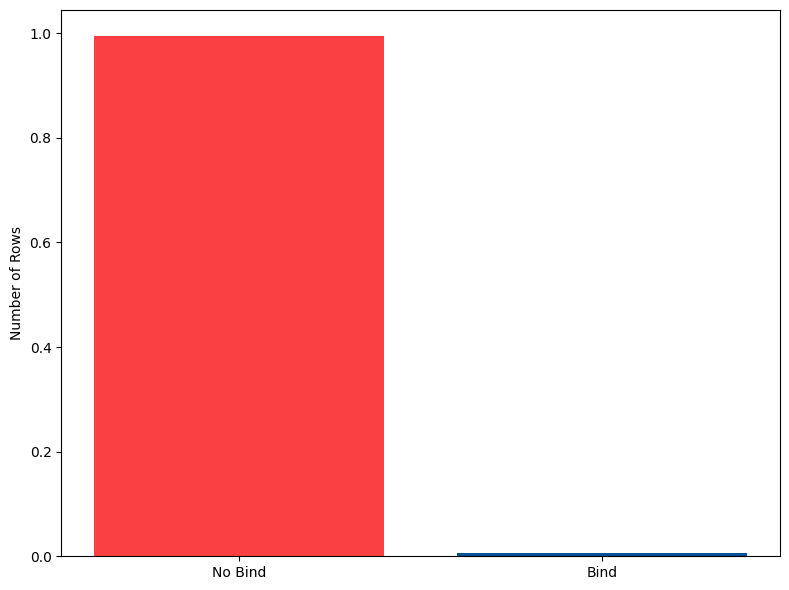

In [25]:
labels = ['No Bind', 'Bind']
total = n_no_bind + n_bind
values = [n_no_bind/total, n_bind/total]

print(f"Total observations: {total:,}")
print(f"No binding: {values[0]:.3f}")
print(f"Binding:    {values[1]:.3f}")

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['#f94144', '#025099'])

# Add title and labels
plt.ylabel('Number of Rows')

# Show the plot
plt.tight_layout()
plt.show()

### Targets


In [26]:
from collections import defaultdict

In [27]:
# Create a scanner to read the dataset
scanner = data_train.scanner()

# Initialize a defaultdict to store the value counts
protein_counts = defaultdict(int)

# Iterate over the batches
for batch in scanner.to_batches():
    # Get the column from the batch
    column = batch['protein_name']
    
    # Convert the column to a dictionary of value counts
    batch_value_counts = dict(zip(column.to_pylist(), pc.value_counts(column).to_pylist()))
    
    # Update the value counts dictionary
    for value, count in batch_value_counts.items():
        protein_counts[value] += int(count["counts"])


In [28]:
# Print the value counts
for value, count in protein_counts.items():
    print(f"{value}: {count}")

BRD4: 98415610
HSA: 98415610
sEH: 98415610
